In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss /= len(train_loader.dataset)
    accuracy = 100. * correct / total
    return train_loss, accuracy

In [3]:
import torch

def evaluate(device, model, dataloader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from models.mlp_wd import MLPWD


print("LinW layers:", "\n".join([f"Depth {model[i].depth}: {model[i]}" for i in range(len(model))]), sep="\n\n")

EPOCHS = 10
BATCH_SIZE = 64

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

model = MLPWD().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    test_accuracy = evaluate(device, model, test_loader)
    print(f'Epoch {epoch + 1}/{EPOCHS}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}%, Test accuracy: {test_accuracy:.2f}%')
    lr_scheduler.step()


LinW layers:

Depth 0: LinW(in_features=256, out_features=256, bias=True)
Depth 1: LinW(in_features=256, out_features=256, bias=True)
Epoch 1/10, Training Loss: 0.4774, Training Accuracy: 85.00%, Test accuracy: 94.58%
Epoch 2/10, Training Loss: 0.1567, Training Accuracy: 95.65%, Test accuracy: 96.28%
Epoch 3/10, Training Loss: 0.1071, Training Accuracy: 97.03%, Test accuracy: 96.88%
Epoch 4/10, Training Loss: 0.0820, Training Accuracy: 97.77%, Test accuracy: 97.42%
Epoch 5/10, Training Loss: 0.0648, Training Accuracy: 98.22%, Test accuracy: 97.82%
Epoch 6/10, Training Loss: 0.0535, Training Accuracy: 98.48%, Test accuracy: 97.31%
Epoch 7/10, Training Loss: 0.0508, Training Accuracy: 98.59%, Test accuracy: 97.49%
Epoch 8/10, Training Loss: 0.0443, Training Accuracy: 98.74%, Test accuracy: 97.18%
Epoch 9/10, Training Loss: 0.0410, Training Accuracy: 98.83%, Test accuracy: 97.81%
Epoch 10/10, Training Loss: 0.0408, Training Accuracy: 98.89%, Test accuracy: 97.48%


In [20]:

# check how it works multihead attention in pytorch
# since in pytorch is available we can use it

num_heads = 4

image = 'https://www.lequipe.fr/_medias/img-photo-jpg/zinedine-zidane-a-ete-joueur-2001-2006-puis-entraineur-du-real-madrid-2016-2018-et-2019-2021-b-papon-l-equipe/1500000001494391/0:0,1995:1330-1008-672-75/276ff'
q = torch.randn(10, 16, 8)
k = torch.randn(10, 16, 8)
v = torch.randn(10, 16, 8)

multihead_attn = nn.MultiheadAttention(8, num_heads, batch_first=False)
attn_output, attn_output_weights = multihead_attn(q, k, v)

torch.Size([3, 1404, 1662])


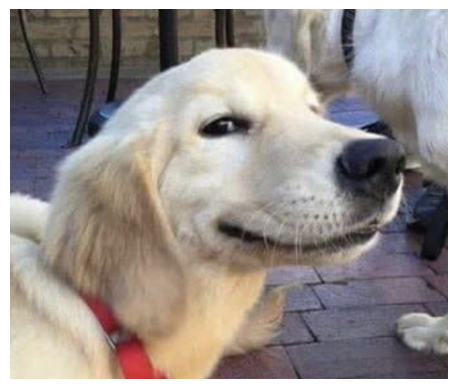

In [51]:
image = 'img/labrador-smile.png'
image = plt.imread(image)
plt.imshow(image[:,:,:3])
plt.axis('off')

num_heads = 2

print(torch.tensor(image[:,:,:3]).permute(2, 0, 1).shape)

image = torch.tensor(image[:,:,:3]).permute(2, 0, 1)

multihead_attn = nn.MultiheadAttention(image.shape[2], num_heads, batch_first=False)
attn_output, attn_output_weights = multihead_attn(image, image, image)